## Waste Management using CNN

In [ ]:
pip install opencv-python

In [ ]:
pip install tensorflow

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install tqdm  # Install the tqdm library
from tqdm import tqdm  # Import the tqdm function

In [3]:
pip install kaggle


In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kollurusekhar","key":"bd3d06635e21b074dd2c221b3427e2dc"}'}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d techsash/waste-classification-data

Dataset URL: https://www.kaggle.com/datasets/techsash/waste-classification-data
License(s): CC-BY-SA-4.0
100% 427M/427M [00:01<00:00, 223MB/s]
100% 427M/427M [00:02<00:00, 224MB/s]


In [7]:
import os
import zipfile

# Path to the dataset ZIP file
dataset_zip = "waste-classification-data.zip"

# Extract the ZIP file
with zipfile.ZipFile(dataset_zip, 'r') as zip_ref:
    zip_ref.extractall("waste_classification_data")

# Check the extracted files
dataset_path = "waste_classification_data"
print("Files in dataset:", os.listdir(dataset_path))


Files in dataset: ['dataset', 'DATASET']


In [8]:
train_path="waste_classification_data/DATASET/TRAIN"
test_path="waste_classification_data/DATASET/TEST"

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array,load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [10]:

#Visualization
x_data = []
y_data = []
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data, 'label':y_data}) # Using pd for DataFrame

100%|██████████| 9999/9999 [00:07<00:00, 1293.90it/s]


In [11]:
data.shape

(22564, 2)

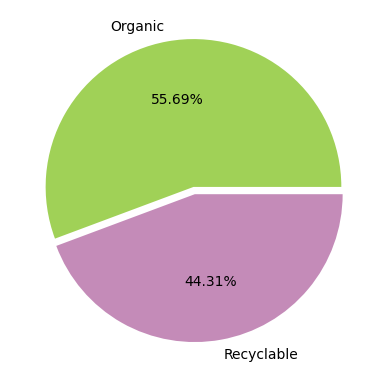

In [12]:
colors=['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(), labels=['Organic', 'Recyclable'],autopct='%0.2f%%',colors=colors,startangle=0, explode=[0.05,0])
plt.show()


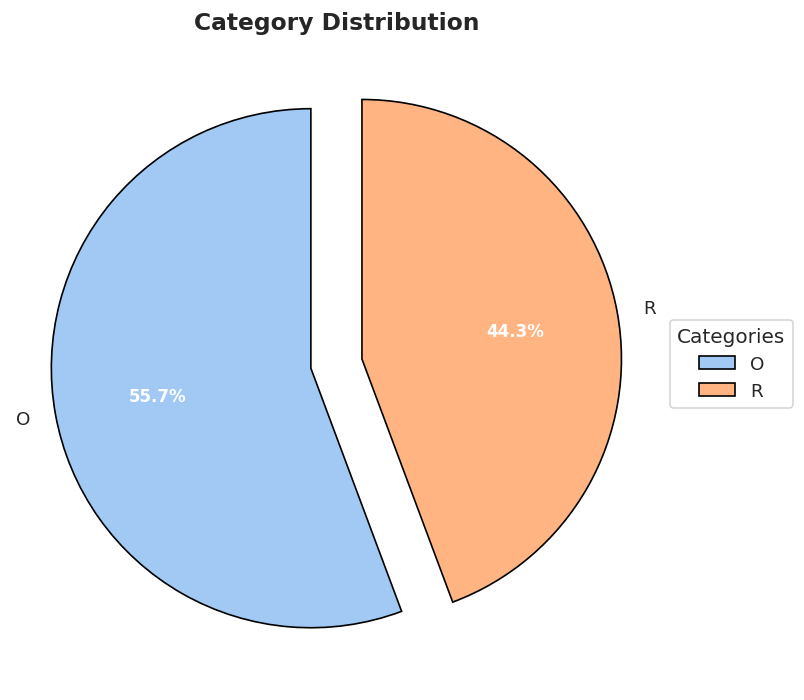

In [13]:
import seaborn as sns
data = pd.DataFrame({'image': x_data, 'label': y_data})

# Advanced Visualization
sns.set_theme(style="whitegrid")

# Prepare data for visualization
label_counts = data['label'].value_counts()
labels = label_counts.index
sizes = label_counts.values
colors = sns.color_palette("pastel", len(labels))  # Dynamic color palette

# Create the pie chart
fig, ax = plt.subplots(figsize=(8, 6), dpi=120)
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1},
    explode=[0.1] * len(labels)  # Add slight explode effect for all categories
)

# Styling the chart
plt.setp(autotexts, size=10, weight="bold", color="white")
ax.set_title("Category Distribution", fontsize=14, fontweight="bold")
ax.legend(wedges, labels, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Show the chart
plt.tight_layout()
plt.show()


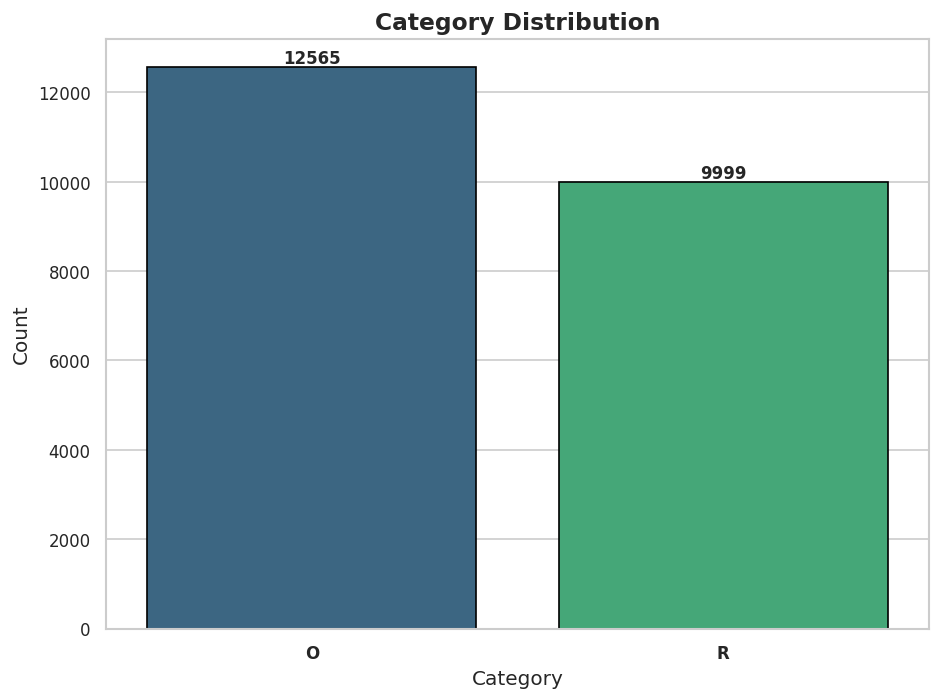

In [14]:
# Prepare data for visualization
label_counts = data['label'].value_counts().reset_index()
label_counts.columns = ['Category', 'Count']

# Set the style and color palette
sns.set_theme(style="whitegrid")
palette = sns.color_palette("viridis", len(label_counts))

# Create the bar plot
plt.figure(figsize=(8, 6), dpi=120)
bar_plot = sns.barplot(
    x='Category',
    y='Count',
    data=label_counts,
    palette=palette,
    edgecolor='black'
)

# Add annotations
for index, row in label_counts.iterrows():
    bar_plot.text(
        x=index,
        y=row['Count'] + 2,  # Position the text slightly above the bar
        s=f"{row['Count']}",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

# Title and labels
plt.title('Category Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

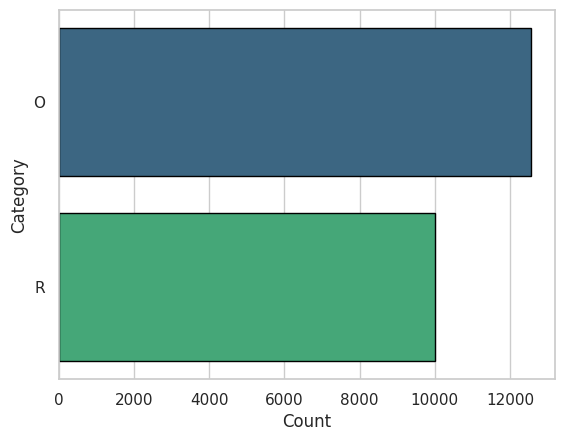

In [15]:
bar_plot = sns.barplot(
    y='Category',
    x='Count',
    data=label_counts,
    palette=palette,
    edgecolor='black'
)

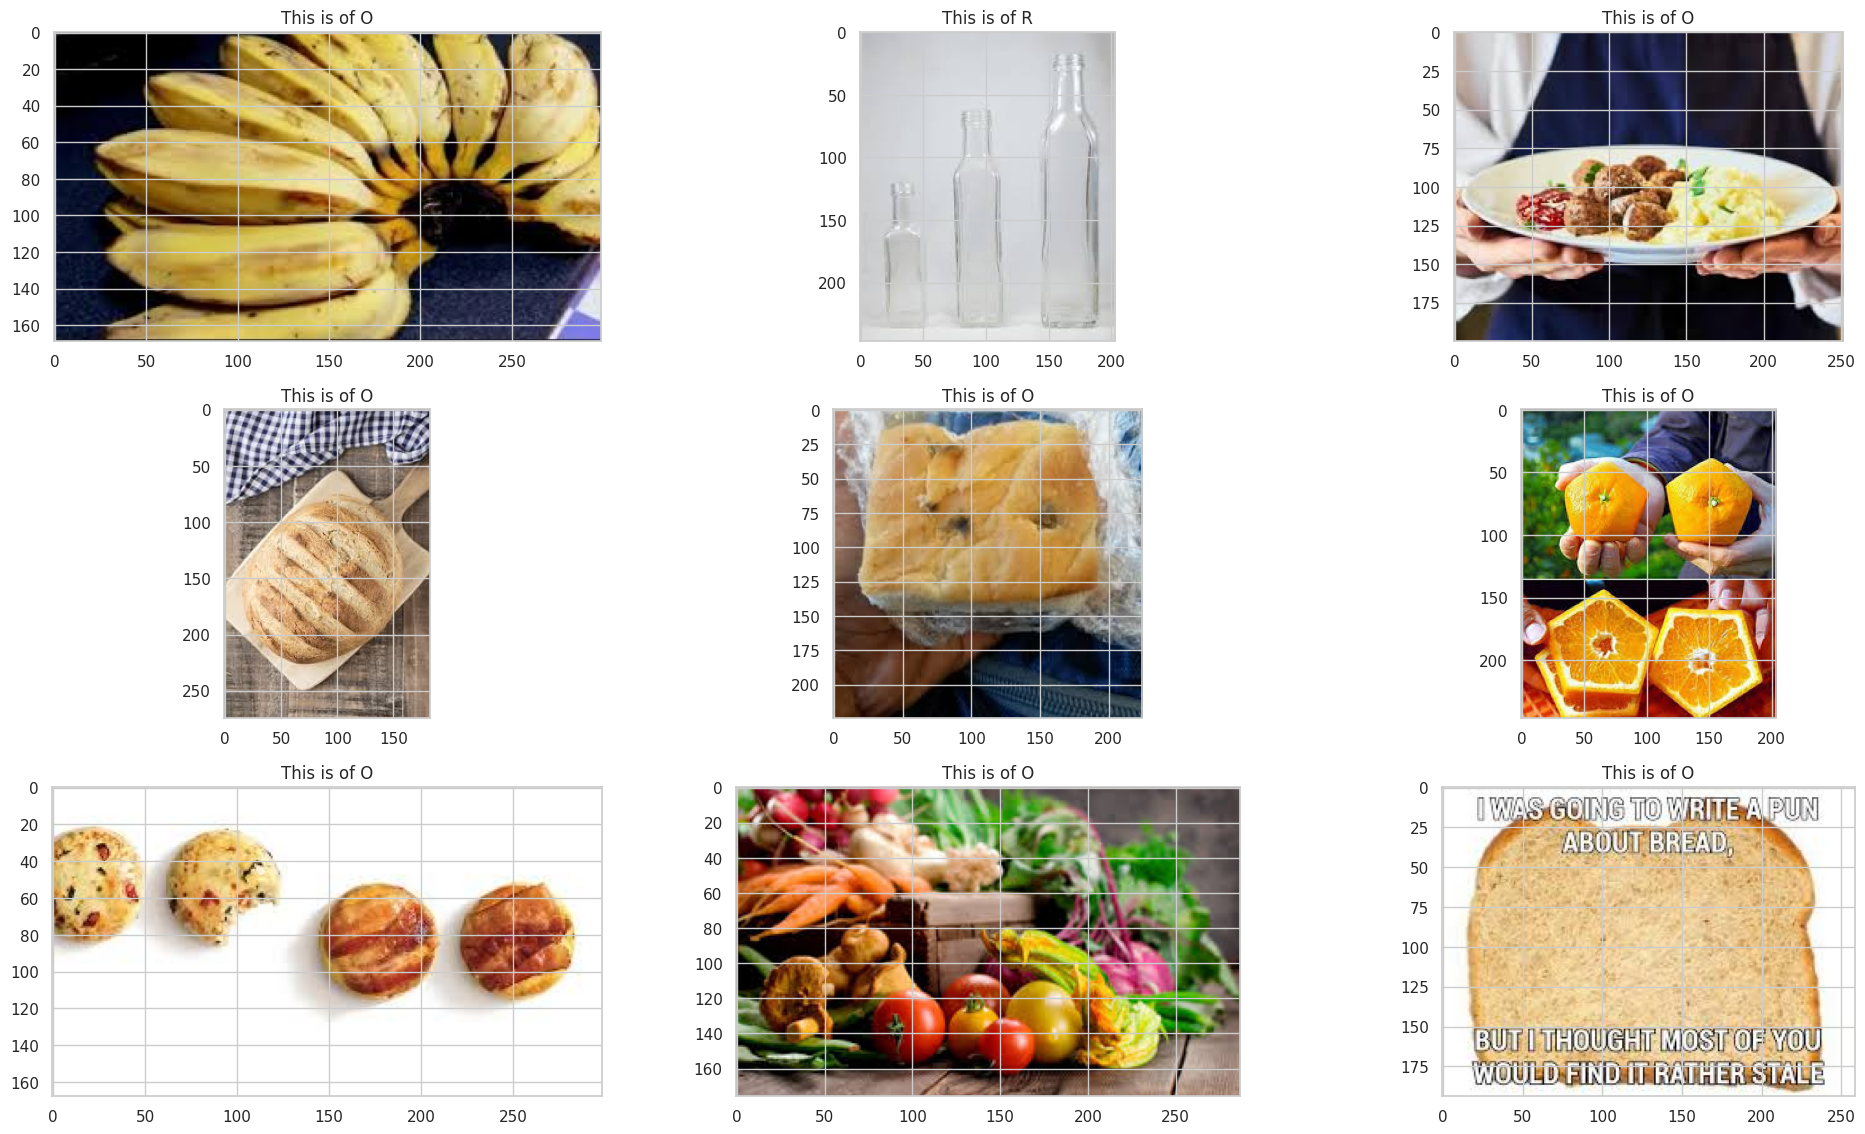

In [17]:
plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4, 3,(i%12)+1)
    index = np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

## CNN

In [18]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])
batch_size = 256

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 109, 109, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 52, 52, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [21]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [22]:
hist = model.fit(
    train_generator,
    epochs=2,
    validation_data=test_generator
)

Epoch 1/2
89/89 ━━━━━━━━━━━━━━━━━━━━ 2781s 31s/step - accuracy: 0.7061 - loss: 0.7108 - val_accuracy: 0.8695 - val_loss: 0.3761
Epoch 2/2
89/89 ━━━━━━━━━━━━━━━━━━━━ 2802s 31s/step - accuracy: 0.8293 - loss: 0.4353 - val_accuracy: 0.8818 - val_loss: 0.3334
